#### Enthlapy fluxes via coupler versus old method: validation using two NUOPC G-compsets

Old method: gmom.e23.GNYF.T62_t061_zstar.enthalpy_via_cpl_ctrl.001
New method: gmom.e23.GNYF.T62_t061_zstar.enthalpy_via_cpl.001

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot
import warnings
warnings.filterwarnings("ignore")

Basemap module not found. Some regional plots may not function properly


In [4]:
case1 = 'gmom.e23.GNYF.T62_t061_zstar.enthalpy_via_cpl.001'
case2 = 'gmom.e23.GNYF.T62_t061_zstar.enthalpy_via_cpl_ctrl.001'
scr = '/glade/scratch/gmarques/'

path1 = scr + case1 +'/run/'
path2 = scr + case2 +'/run/'

grd = MOM6grid(path1+case1+'.mom6.static.nc')

MOM6 grid successfully loaded... 



In [5]:
frc1 =  xr.open_dataset(path1+case1+'.mom6.hm_0001.nc')
frc2 =  xr.open_dataset(path2+case2+'.mom6.hm_0001.nc')

In [6]:
frc1

<xarray.Dataset>
Dimensions:                                (xq: 540, yh: 458, time: 1, nv: 2, xh: 540, yq: 458, scalar_axis: 1)
Coordinates:
  * xq                                     (xq) float64 -286.3 -285.7 ... 73.0
  * yh                                     (yh) float64 -79.2 -79.08 ... 87.74
  * time                                   (time) object 0001-07-02 12:00:00
  * nv                                     (nv) float64 1.0 2.0
  * xh                                     (xh) float64 -286.7 -286.0 ... 72.67
  * yq                                     (yq) float64 -79.14 -79.01 ... 87.74
  * scalar_axis                            (scalar_axis) float64 0.0
Data variables: (12/49)
    taux                                   (time, yh, xq) float64 ...
    tauy                                   (time, yq, xh) float64 ...
    ustar                                  (time, yh, xh) float64 ...
    PRCmE                                  (time, yh, xh) float64 ...
    lprec                                  (time, yh, xh) float64 ...
    fprec                                  (time, yh, xh) float64 ...
    ...                                     ...
    net_massout                            (time, yh, xh) float64 ...
    net_massin                             (time, yh, xh) float64 ...
    average_T1                             (time) object ...
    average_T2                             (time) object ...
    average_DT                             (time) timedelta64[ns] ...
    time_bnds                              (time, nv) timedelta64[ns] ...
Attributes:
    NumFilesInSet:     1
    title:             MOM6 diagnostic fields table for CESM case: gmom.e23.G...
    associated_files:  area_t: gmom.e23.GNYF.T62_t061_zstar.enthalpy_via_cpl....
    grid_type:         regular
    grid_tile:         N/A

### heat content from mass added/removed

In [7]:
heat_content_lrunoff_1 = np.ma.masked_invalid(frc1.heat_content_lrunoff.mean(dim='time').values)
heat_content_frunoff_1 = np.ma.masked_invalid(frc1.heat_content_frunoff.mean(dim='time').values)
heat_content_lprec_1 = np.ma.masked_invalid(frc1.heat_content_lprec.mean(dim='time').values)
heat_content_fprec_1 = np.ma.masked_invalid(frc1.heat_content_fprec.mean(dim='time').values)
heat_content_cond_1 = np.ma.masked_invalid(frc1.heat_content_cond.mean(dim='time').values)
heat_content_vprec_1 = np.ma.masked_invalid(frc1.heat_content_vprec.mean(dim='time').values)
heat_content_icemelt_1 = np.ma.masked_invalid(frc1.heat_content_icemelt.mean(dim='time').values)
Heat_PmE_1 = np.ma.masked_invalid(frc1.Heat_PmE.mean(dim='time').values)
heat_content_all_1 = heat_content_lrunoff_1 + heat_content_frunoff_1 + heat_content_lprec_1 + \
                     heat_content_vprec_1 + heat_content_cond_1 + heat_content_icemelt_1 + heat_content_fprec_1

In [8]:
heat_content_lrunoff_2 = np.ma.masked_invalid(frc2.heat_content_lrunoff.mean(dim='time').values)
heat_content_frunoff_2 = np.ma.masked_invalid(frc2.heat_content_frunoff.mean(dim='time').values)
heat_content_lprec_2 = np.ma.masked_invalid(frc2.heat_content_lprec.mean(dim='time').values)
heat_content_fprec_2 = np.ma.masked_invalid(frc2.heat_content_fprec.mean(dim='time').values)
heat_content_cond_2 = np.ma.masked_invalid(frc2.heat_content_cond.mean(dim='time').values)
heat_content_vprec_2 = np.ma.masked_invalid(frc2.heat_content_vprec.mean(dim='time').values)
heat_content_icemelt_2 = np.ma.masked_invalid(frc2.heat_content_icemelt.mean(dim='time').values)
Heat_PmE_2 = np.ma.masked_invalid(frc2.Heat_PmE.mean(dim='time').values)
heat_content_all_2 = heat_content_lrunoff_2 + heat_content_frunoff_2 + heat_content_lprec_2 + \
                     heat_content_vprec_2 + heat_content_cond_2 + heat_content_icemelt_2 + heat_content_fprec_2

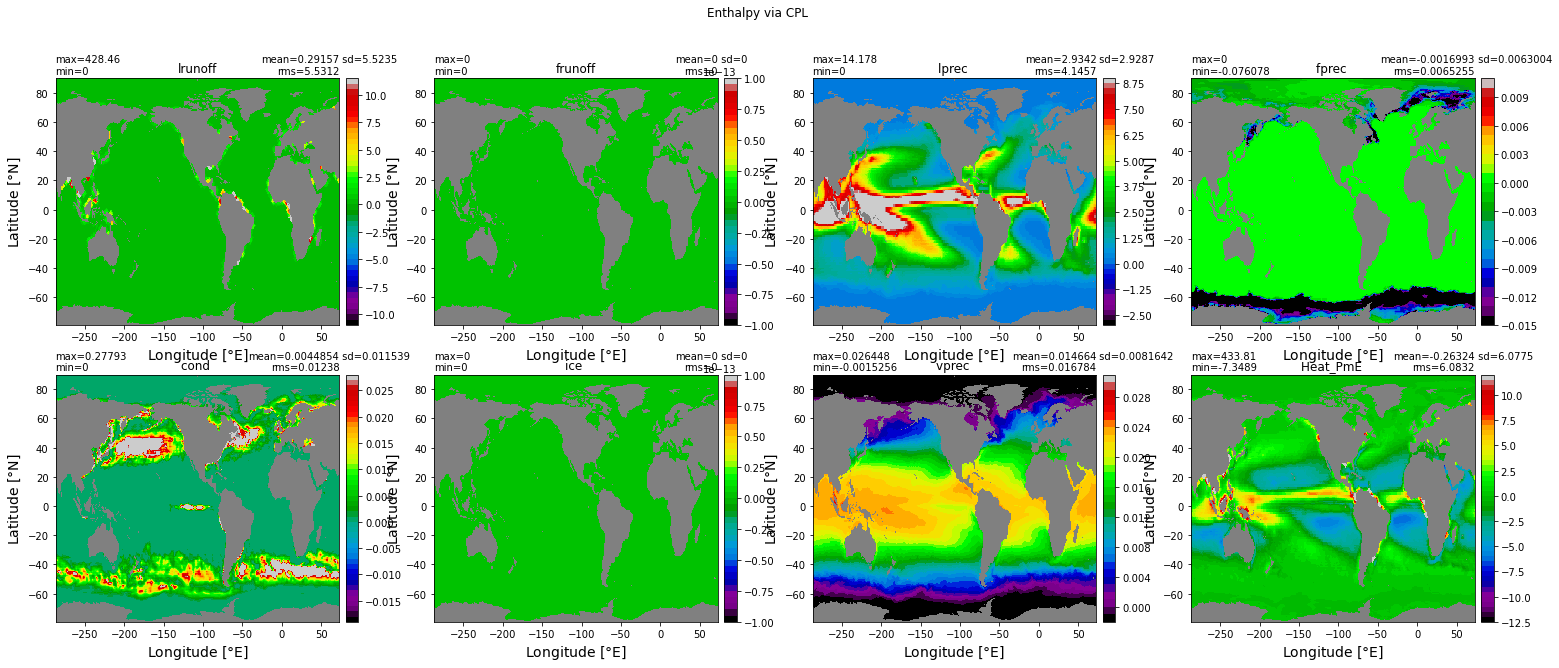

In [10]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(26,10))
ax1 = ax.flatten()
plt.suptitle('Enthalpy via CPL')

xyplot(heat_content_lrunoff_1, grd.geolon, grd.geolat, grd.area_t, title='lrunoff', 
       axis=ax1[0], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_frunoff_1, grd.geolon, grd.geolat, grd.area_t, title='frunoff', 
       axis=ax1[1], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_lprec_1, grd.geolon, grd.geolat, grd.area_t, title='lprec ', 
       axis=ax1[2], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_fprec_1, grd.geolon, grd.geolat, grd.area_t, title='fprec ', 
       axis=ax1[3], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_cond_1, grd.geolon, grd.geolat, grd.area_t, title='cond ', 
       axis=ax1[4], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_icemelt_1, grd.geolon, grd.geolat, grd.area_t, title='ice ', 
       axis=ax1[5], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_vprec_1, grd.geolon, grd.geolat, grd.area_t, title='vprec ', 
       axis=ax1[6], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(Heat_PmE_1, grd.geolon, grd.geolat, grd.area_t, title='Heat_PmE ', 
       axis=ax1[7], nbins=50, colormap=plt.cm.nipy_spectral)

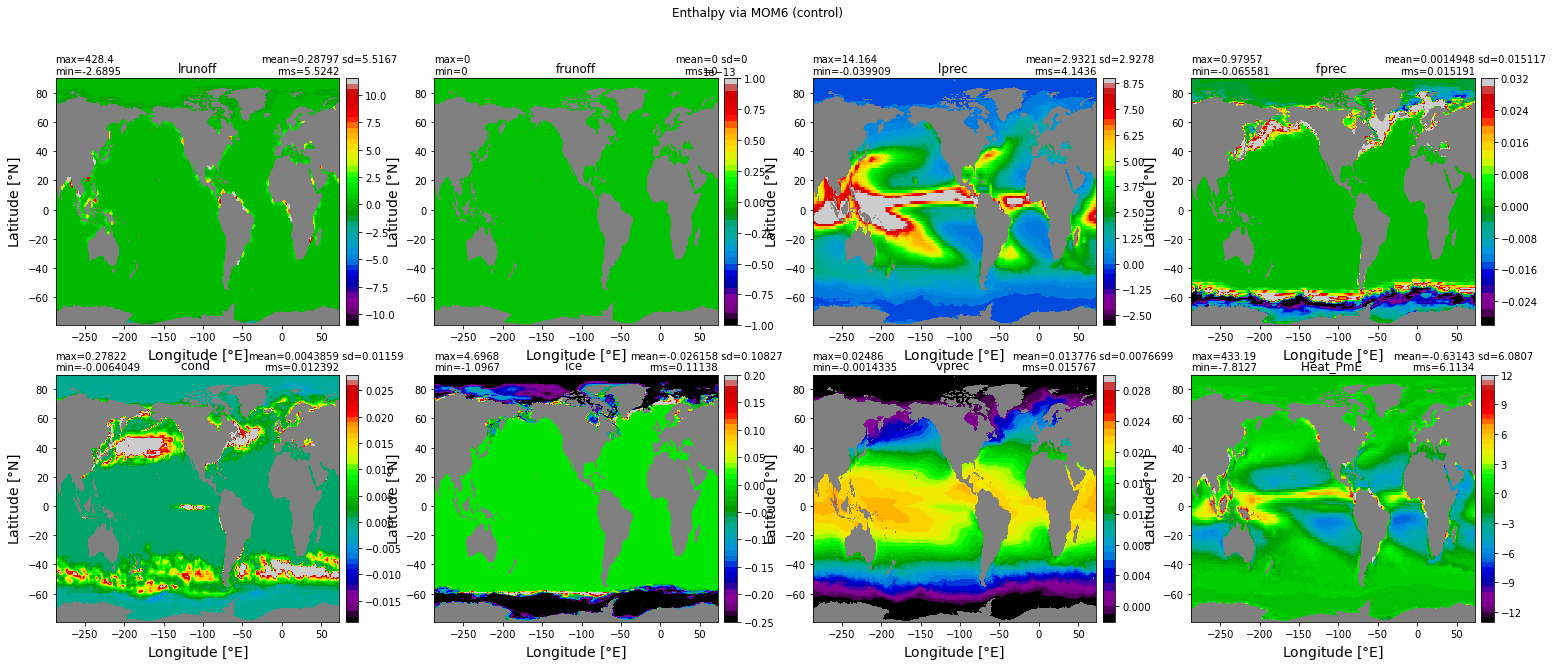

In [11]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(26,10))
ax1 = ax.flatten()
plt.suptitle('Enthalpy via MOM6 (control)')

xyplot(heat_content_lrunoff_2, grd.geolon, grd.geolat, grd.area_t, title='lrunoff', 
       axis=ax1[0], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_frunoff_2, grd.geolon, grd.geolat, grd.area_t, title='frunoff', 
       axis=ax1[1], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_lprec_2, grd.geolon, grd.geolat, grd.area_t, title='lprec ', 
       axis=ax1[2], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_fprec_2, grd.geolon, grd.geolat, grd.area_t, title='fprec ', 
       axis=ax1[3], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_cond_2, grd.geolon, grd.geolat, grd.area_t, title='cond ', 
       axis=ax1[4], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_icemelt_2, grd.geolon, grd.geolat, grd.area_t, title='ice ', 
       axis=ax1[5], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_vprec_2, grd.geolon, grd.geolat, grd.area_t, title='vprec ', 
       axis=ax1[6], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(Heat_PmE_2, grd.geolon, grd.geolat, grd.area_t, title='Heat_PmE ', 
       axis=ax1[7], nbins=50, colormap=plt.cm.nipy_spectral)

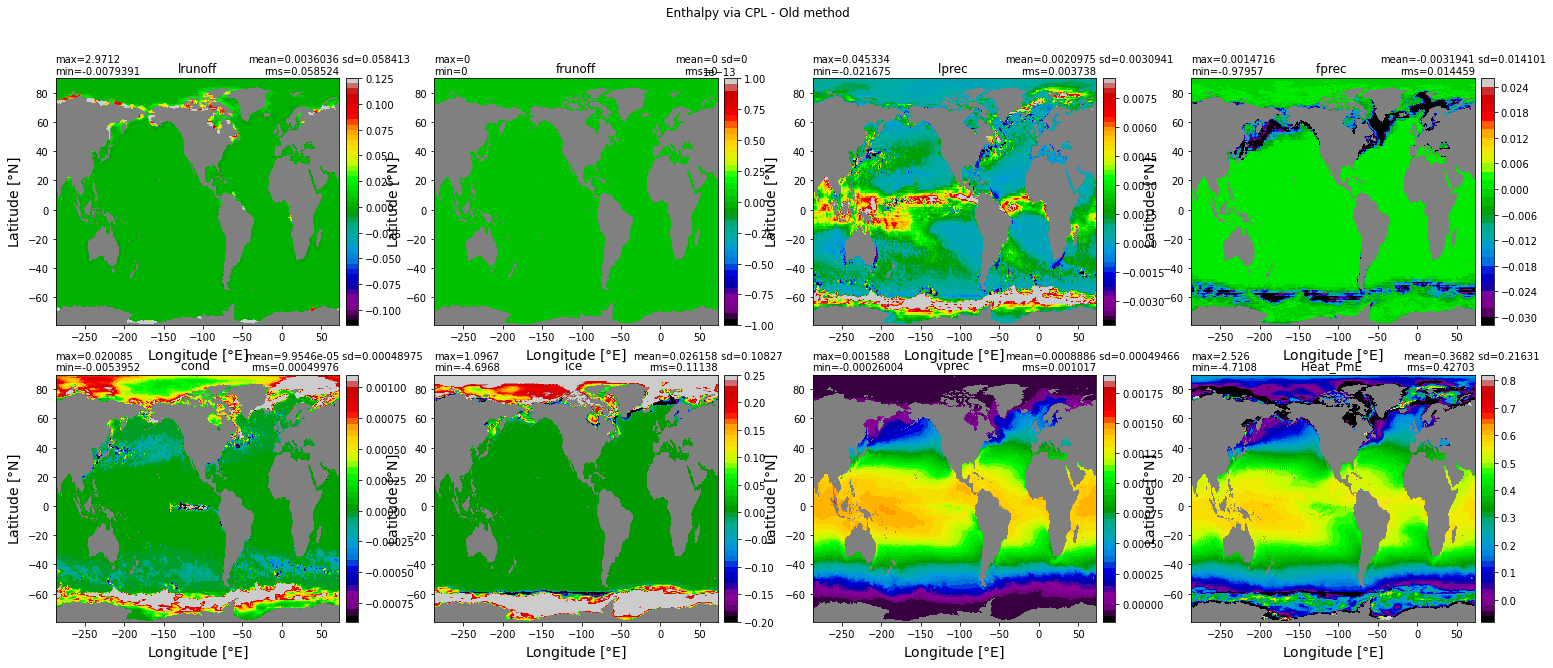

In [12]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(26,10))
ax1 = ax.flatten()
plt.suptitle('Enthalpy via CPL - Old method')

xyplot(heat_content_lrunoff_1 - heat_content_lrunoff_2, grd.geolon, grd.geolat, grd.area_t, title='lrunoff', 
       axis=ax1[0], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_frunoff_1 - heat_content_frunoff_2, grd.geolon, grd.geolat, grd.area_t, title='frunoff', 
       axis=ax1[1], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_lprec_1 - heat_content_lprec_2, grd.geolon, grd.geolat, grd.area_t, title='lprec ', 
       axis=ax1[2], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_fprec_1 - heat_content_fprec_2, grd.geolon, grd.geolat, grd.area_t, title='fprec ', 
       axis=ax1[3], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_cond_1 - heat_content_cond_2, grd.geolon, grd.geolat, grd.area_t, title='cond ', 
       axis=ax1[4], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_icemelt_1 - heat_content_icemelt_2, grd.geolon, grd.geolat, grd.area_t, title='ice ', 
       axis=ax1[5], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(heat_content_vprec_1 - heat_content_vprec_2, grd.geolon, grd.geolat, grd.area_t, title='vprec ', 
       axis=ax1[6], nbins=50, colormap=plt.cm.nipy_spectral)
xyplot(Heat_PmE_1 - Heat_PmE_2, grd.geolon, grd.geolat, grd.area_t, title='Heat_PmE ', 
       axis=ax1[7], nbins=50, colormap=plt.cm.nipy_spectral)